In [3]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Regression: Student grade prediction

In [4]:
file_path = "C:\\Users\\Zayan\\Documents\\datasets\\student+performance\\student"

try:
    df1 = pd.read_csv(f"{file_path}\\student-mat.csv")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")

except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty.")

except pd.errors.ParserError:
    print(f"Error: Unable to parse the CSV file '{file_path}'. Check the file format.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [5]:
df1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


# MNIST classification

In [6]:
from torch.utils.data import Dataset
import torchvision
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor
torch.set_printoptions(linewidth=120)

## Load Data and build dataloader

In [45]:
train_set = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_set = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

K = 10
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=K, shuffle=True
)

In [46]:
print("len of training data =", len(train_set))
print("number of batches =", len(train_loader))

print("shape of a sample = ", len(train_set[0]))

print("sample feature data:")
print(train_set[0][0]) # features
print("sample label data:")
print(train_set[0][1]) # labels

len of training data = 60000
number of batches = 6000
shape of a sample =  2
sample feature data:
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.000

Check if dataset is balanced

In [47]:
train_set.train_labels.bincount() # count of each label in train_set

c:\Users\Zayan\anaconda3\envs\ci_win\Lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

## Study a single sample

Access sample

In [48]:
sample = next(iter(train_set)) # convert train_set to an iterable and access first element
print(len(sample)) # len of sample
print(type(sample)) # type of sample

image, label = sample

2
<class 'tuple'>


In [11]:
image.shape

torch.Size([1, 28, 28])

In [12]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
       

Plot image

label:  5


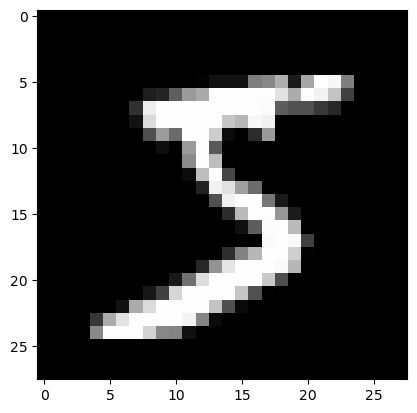

In [49]:
plt.imshow(image.squeeze(), cmap='gray')
print('label: ',label)

## Study a batch

In [14]:
batch = next(iter(train_loader))
len(batch)

2

In [15]:
print(type(batch))

<class 'list'>


In [50]:
images, labels = batch

print("len of images: ",len(images))
print("shape of images: ", images.shape)
print("shape of 1 image: ", images[0].shape)

len of images:  10
shape of images:  torch.Size([10, 1, 28, 28])
shape of 1 image:  torch.Size([1, 28, 28])


Plot whole batch

labels tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])


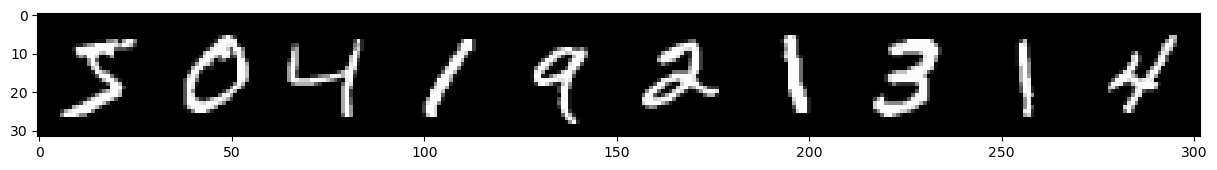

In [51]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels', labels)

## Build network

## Vanilla

In [29]:
class VanillaNetwork(nn.Module):
    def __init__(self) -> None:
        super(VanillaNetwork, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) # 1 input color channel x 6 filters = 6 response fields
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5) # 6 input response fields x 12 filters = 72 response fields (12 for each input field)

        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120) # Why in_channels=12*4*4?
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        t = self.layer(t)
        return t

    

In [30]:
net = VanillaNetwork()
print(net)

# conv layer weight shape = [# filters, # depth of filters = # input, # of height, # width]
# dense layer weight shape = [# output features, # input features]
print(net.conv1.weight.shape)
print(net.conv2.weight.shape)
print(net.fc1.weight.shape)
print(net.fc2.weight.shape)
print(net.out.weight.shape)

VanillaNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)
torch.Size([6, 1, 5, 5])
torch.Size([12, 6, 5, 5])
torch.Size([120, 192])
torch.Size([60, 120])
torch.Size([10, 60])


Inspect the weights

In [36]:
net.conv1.weight

Parameter containing:
tensor([[[[-0.0847, -0.1357, -0.1344, -0.0212,  0.1297],
          [ 0.0996, -0.1883, -0.0733,  0.0814, -0.1574],
          [-0.1511,  0.1390, -0.0871,  0.1403, -0.0229],
          [ 0.1405, -0.1275,  0.1056, -0.1269,  0.0449],
          [ 0.1016,  0.0825, -0.1321,  0.1055, -0.1386]]],


        [[[ 0.0615,  0.1697, -0.1180, -0.0754, -0.1885],
          [ 0.1604, -0.1520,  0.1810, -0.1485,  0.1285],
          [-0.0352, -0.0291, -0.0389, -0.0540,  0.1457],
          [-0.0112,  0.0902,  0.0376, -0.0534, -0.0929],
          [ 0.0267,  0.0977,  0.1986,  0.1222, -0.1570]]],


        [[[ 0.0883, -0.1381,  0.1843,  0.1773,  0.1930],
          [-0.1396,  0.1731, -0.1045, -0.0976,  0.0807],
          [-0.0633,  0.1308, -0.0836,  0.1971, -0.0303],
          [-0.0993,  0.1341,  0.1685,  0.0762,  0.1217],
          [-0.1918, -0.1582,  0.0741,  0.0290,  0.0483]]],


        [[[-0.1541, -0.1136,  0.1958, -0.0742,  0.0154],
          [-0.0977, -0.0111,  0.0295, -0.1759,  0.0195

MLP weight matrix

In [39]:
in_features = torch.tensor([1,2,3,4])
weights = torch.tensor([[1,2,3,4],
                        [2,3,4,5],
                        [3,4,5,6]])

out_features = weights @ in_features
print(out_features)

tensor([30, 40, 50])


 Access all parameters in a loop

In [43]:
for param in net.parameters():
    print(param.shape)
    
print()
for name, param in net.named_parameters():
    print(name, '\t\t', param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


## Dr Anderson's CNN

In [54]:
# lets name oue neural network "CNN_Anderson"
class CNN_Anderson(nn.Module):
    
    # this is our CNN_Anderson initilization function     
    def __init__(self, size, num_classes):
        # self is ... well ourself! (https://www.askpython.com/python/python-self-variable)
        # other variables are ones we made up
        #   size is the number of spectral bands in our image (e.g., MNIST is 1, RGB imagery is 3)
        #   num_classes is the number of output neurons (e.g., num_classes = 10 for 10 classes in MNIST)

        # lets call our super function (https://www.pythonforbeginners.com/super/working-python-super-function)
        # we do this first,  call its init fx
        super(CNN_Anderson, self).__init__()

        # here is our "feature extraction" via convolutional layers 
        #   note: assume we got a single channel (grayscale) MNIST image of size 28x28x1
        #         first layer
        #             28x28x1 -> convolution (1 stride, 1 padd, 3x3 kernel, 2 kernels) -> 28x28x2
        #         pooling
        #             pool of 2x2 => 28x28 / 2 => 14x14 now (technically, 14x14x2 right!)
        #         second layer
        #             14x14x2 -> convolution (1 stride, 1 padd, 3x3 kernel, 4 kernels) -> 14x14x4
        #         pooling
        #             pool of 2x2 => 14x14 / 2 => 7x7 now (technically, 7x7x4 right!)
        self.extract = nn.Sequential( # lets make a 2D convolution layer
                                      nn.Conv2d( in_channels = size, out_channels = 2, 
                                                 kernel_size = 3, stride = 1, padding = 1), 
                                                     # in_channels = 1 for MNIST and 3 for RGB image
                                                     # out_channels = 2 means 2 shared weights/features
                                                     # kernel_size = 3 means a 3x3 size kernel
                                                     # stride = 1 means move one pixel at a time in each dim
                                                     # padding = adds one pixel of zeros to each side of each dim
                                                     #           note, thats what keeps our spatial dims the same for a 3x3 kernel
                                                     #           it also lets us process each location, even that border!!!
                                      # its a NN, lets run a non-linearity on each of those results!
                                      nn.ReLU(inplace = True),
                                                     # could also use torch.nn.Sigmoid or etc.
                                                     # inplace means don't have to return a result, do it on the data
                                      # ----------------------------------------------------------- 
                                      # !!! hey, we just made a layer of convolution/nonlin !!!
                                      # ----------------------------------------------------------- 
                                      # lets pool using a 2x2 region that is not overlapping
                                      nn.MaxPool2d(2),                                                  
                                      # lets do dropout with a small percentage/rate               
                                      # nn.Dropout(0.1),
                                      # ----------------------------------------------------------- 
                                      # now, lets make another layer of convolution, pooling, and drop out
                                      nn.Conv2d( in_channels = 2, out_channels = 4, 
                                                 kernel_size = 3, stride = 1, padding = 1),
                                                 # in_channels here needs to match out_channels above
                                                 # lets use 5 filters 
                                      nn.ReLU(inplace = True),
                                      nn.MaxPool2d(2),
                                      nn.Dropout(0.1), )

        # ok, now we are going to make a simple MLP classifier on the end of our above features
        self.decimate = nn.Sequential( nn.Linear(4*(7*7), 12),  
                                            # take our 4 filters whose response fields are 7x7 to 12 neurons
                                       nn.ReLU(inplace = True), # run a nonlinearity
                                       nn.Dropout(0.2), # some drop out
                                       nn.Linear(12, num_classes) ) # map the 32 down to our number of output classes
 
    #----------------------------
    # Model: Invoke Forward Pass
    #----------------------------

    def forward(self, x):

        features = self.extract(x) # easy, pass input (x) to our "feature extraction" above
        features = features.view(features.size()[0], -1) # now, flatten 7x7x4 matrix to 1D array of 7*7*4 size
        myresult = self.decimate(features) # pass that to our MLP classifier, and done!!!

        return myresult

## Dr Anderson's CNN with dropout

In [55]:
# lets name oue neural network "CNN_Anderson"
class CNN_Anderson_dropout(nn.Module):
    
    # this is our CNN_Anderson initilization function     
    def __init__(self, size, num_classes):
        # self is ... well ourself! (https://www.askpython.com/python/python-self-variable)
        # other variables are ones we made up
        #   size is the number of spectral bands in our image (e.g., MNIST is 1, RGB imagery is 3)
        #   num_classes is the number of output neurons (e.g., num_classes = 10 for 10 classes in MNIST)

        # lets call our super function (https://www.pythonforbeginners.com/super/working-python-super-function)
        # we do this first,  call its init fx
        super(CNN_Anderson, self).__init__()

        # here is our "feature extraction" via convolutional layers 
        #   note: assume we got a single channel (grayscale) MNIST image of size 28x28x1
        #         first layer
        #             28x28x1 -> convolution (1 stride, 1 padd, 3x3 kernel, 2 kernels) -> 28x28x2
        #         pooling
        #             pool of 2x2 => 28x28 / 2 => 14x14 now (technically, 14x14x2 right!)
        #         second layer
        #             14x14x2 -> convolution (1 stride, 1 padd, 3x3 kernel, 4 kernels) -> 14x14x4
        #         pooling
        #             pool of 2x2 => 14x14 / 2 => 7x7 now (technically, 7x7x4 right!)
        self.extract = nn.Sequential( # lets make a 2D convolution layer
                                      nn.Conv2d( in_channels = size, out_channels = 2, 
                                                 kernel_size = 3, stride = 1, padding = 1), 
                                                     # in_channels = 1 for MNIST and 3 for RGB image
                                                     # out_channels = 2 means 2 shared weights/features
                                                     # kernel_size = 3 means a 3x3 size kernel
                                                     # stride = 1 means move one pixel at a time in each dim
                                                     # padding = adds one pixel of zeros to each side of each dim
                                                     #           note, thats what keeps our spatial dims the same for a 3x3 kernel
                                                     #           it also lets us process each location, even that border!!!
                                      # its a NN, lets run a non-linearity on each of those results!
                                      nn.ReLU(inplace = True),
                                                     # could also use torch.nn.Sigmoid or etc.
                                                     # inplace means don't have to return a result, do it on the data
                                      # ----------------------------------------------------------- 
                                      # !!! hey, we just made a layer of convolution/nonlin !!!
                                      # ----------------------------------------------------------- 
                                      # lets pool using a 2x2 region that is not overlapping
                                      nn.MaxPool2d(2),                                                  
                                      # lets do dropout with a small percentage/rate               
                                      nn.Dropout(0.1),
                                      # ----------------------------------------------------------- 
                                      # now, lets make another layer of convolution, pooling, and drop out
                                      nn.Conv2d( in_channels = 2, out_channels = 4, 
                                                 kernel_size = 3, stride = 1, padding = 1),
                                                 # in_channels here needs to match out_channels above
                                                 # lets use 5 filters 
                                      nn.ReLU(inplace = True),
                                      nn.MaxPool2d(2),
                                      nn.Dropout(0.1), )

        # ok, now we are going to make a simple MLP classifier on the end of our above features
        self.decimate = nn.Sequential( nn.Linear(4*(7*7), 12),  
                                            # take our 4 filters whose response fields are 7x7 to 12 neurons
                                       nn.ReLU(inplace = True), # run a nonlinearity
                                       nn.Dropout(0.2), # some drop out
                                       nn.Linear(12, num_classes) ) # map the 32 down to our number of output classes
 
    #----------------------------
    # Model: Invoke Forward Pass
    #----------------------------

    def forward(self, x):

        features = self.extract(x) # easy, pass input (x) to our "feature extraction" above
        features = features.view(features.size()[0], -1) # now, flatten 7x7x4 matrix to 1D array of 7*7*4 size
        myresult = self.decimate(features) # pass that to our MLP classifier, and done!!!

        return myresult

## Inference

In [56]:
# data dependent hyperparams
input_size = 1
num_classes = 10

# model
model = CNN_Anderson(input_size, num_classes)

# some hyperparameters
learning_rate = 0.0001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
costfx = torch.nn.CrossEntropyLoss()

# ChatGPT

In [65]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load and preprocess the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]) # 'compose() allows stringing together multiple transformations.
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Instantiate the model, loss function, and optimizer
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Test the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')


Epoch [1/5], Step [100/938], Loss: 0.3455
Epoch [1/5], Step [200/938], Loss: 0.0975
Epoch [1/5], Step [300/938], Loss: 0.0499
Epoch [1/5], Step [400/938], Loss: 0.0767
Epoch [1/5], Step [500/938], Loss: 0.1096
Epoch [1/5], Step [600/938], Loss: 0.2611
Epoch [1/5], Step [700/938], Loss: 0.0671
Epoch [1/5], Step [800/938], Loss: 0.0230
Epoch [1/5], Step [900/938], Loss: 0.1362
Epoch [2/5], Step [100/938], Loss: 0.0437
Epoch [2/5], Step [200/938], Loss: 0.0179
Epoch [2/5], Step [300/938], Loss: 0.0054
Epoch [2/5], Step [400/938], Loss: 0.0121
Epoch [2/5], Step [500/938], Loss: 0.0736


KeyboardInterrupt: 